## Taller opcional

Shirley Katherine Maldonado Meza - 1004807437

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sympy

**1**. Calcule el valor de PI usando el metodo de montecarlo, recuerde la definicion de PI

##### Sabemos que el área de una circunferencia es pi*r^2 entonces, tomando una circunferencia de radio pi tenemos que pi=área y el área de un cuarto circunferencia sería pi/4, entonces hallaré el área de media circunferencia para hallar pi

In [8]:
a=0
b=1
n=1000000   #N es el número de puntos

def fcir(x):
    return np.sqrt(1 - x**2)

area_cuadro=1
Puntosbajo=0

for i in range(n):
    k_x=random.uniform(a,b)
    k_y=random.uniform(a,b)
    k_fx=fcir(k_x)
    if k_y<=k_fx:
        Puntosbajo = Puntosbajo +1

pi= ((Puntosbajo/n)*area_cuadro)*4

print('pi hallado con MC - Von Neuman:', pi)

pi hallado con MC - Von Neuman: 3.142236


##### Ahora pi usando Expectation value

In [9]:
xpi = np.random.uniform(a,b,n)
in_cir=np.mean(fcir(xpi))*(b-a)  #Es el área de un cuarto de circunferencia de r=1 o sea pi/4

print("Valor de la integral con MC-expectation value method: \n", in_cir*4)

Valor de la integral con MC-expectation value method: 
 3.142225861774754


**2** Calcule la integral, usando montecarlo, grafique.

$$\int_{0}^{\pi}x^{2}\cos(x)dx$$ 

##### Usando el método de Mean values

In [10]:
def f(x):
    return x*x*np.cos(x)

a=0
b=np.pi
N=1000   #N es el número de puntos

x = np.random.uniform(a,b,N)

integral=np.mean(f(x))*(b-a)
print("Valor de la integral con MC-expectation value method: \n", integral)

Valor de la integral con MC-expectation value method: 
 -6.1184516146380155


##### Usando Von Neuman

Este método toma puntos aletorios y va mirando si hay puntos debajo o encima de la función. Como la función que tenemos
tiene una raíz dentro del intervalo, o sea, 'y' se hace negativo, entonces toca mirar la cantidad de puntos encima de la función mientras y>0
y esa cantidad de puntos, multiplicarla por el área del rectangulo de base x cuando f(x)=0 y de altura pi.

Luego, analizar la cantidad de puntos sobre la gráfica cuando y<0 y esa cantidad, dividirla por los puntos totales y
multiplicarlas por el área del rectángulo de base pi-x y altura pi.

raíz pi/2
Valor de la integral usando MC Von Neuman es:  -6.481534569535959


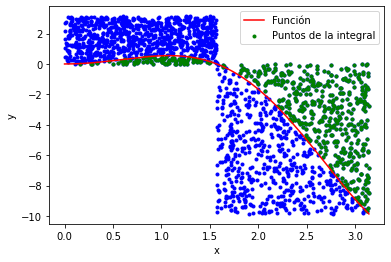

In [11]:
#Con ayuda de sympy halló el x para el cual f(x)=0
x1 = sympy.symbols('x1')
ff = x1*2 *sympy.cos(x1)
print("raíz",sympy.solve(ff, x1)[1])  #Tiene 3 raíces pero la que se usa es pi/2 pues es la que está dentro
                                      #del intervalo [a, b]

#Primero hallo la integral bajo la curva 
Area_a=(np.pi/2)*np.pi  #el aréa es pi/2 * pi = b*h

X=[]
Y=[]
kyy=[]
kxx=[]
PuntosAd_a=0    #Contador de número de puntos bajo la curva
PuntosAd_b=0    #Contador de número de puntos sobre la curva

for i in range(N):
    kx=random.uniform(a,b/2)
    ky=random.uniform(a, b)
    kfx=f(kx)
    X.append(kx)  #Pareja de puntos aleatorios
    Y.append(ky)
    if ky<kfx:
        PuntosAd_a = PuntosAd_a +1
        kyy.append(ky)   #Puntos que quedan bajo la curva
        kxx.append(kx)

integralA= (PuntosAd_a/N)*Area_a
        
#Y ahora para los que puntos que están sobre la curva, se toma un rectángulo cuya base va de pi/2 hasta pi, y
#su altura es de 0 hasta f(pi) y hallo la integral sobre la curva

Area_b= (np.pi/2)*f(np.pi)
for i in range(N):
    kx=random.uniform(b/2,b)
    ky=random.uniform(a, f(np.pi))
    kfx=f(kx)
    X.append(kx)  #Pareja de puntos aleatorios
    Y.append(ky)
    if ky>=kfx:
        PuntosAd_b = PuntosAd_b +1
        kyy.append(ky)   #Puntos que quedan sobre la curva
        kxx.append(kx)
integralB= (PuntosAd_b/N)*Area_b


print("Valor de la integral usando MC Von Neuman es: ", integralA + integralB)
    
#Gráfica
xx=np.linspace(a, b, N)
plt.scatter(X, Y, color='blue', marker='.')
plt.scatter(kxx, kyy, color='g', marker='.', label='Puntos de la integral')
plt.plot(xx, f(xx), 'r', label='Función')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()